<a href="https://colab.research.google.com/github/gauravgaikwadit/Afame_Technologies_Internship_project-/blob/main/Afame_Internship_Project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('Sales.csv')

data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [ ]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [ ]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [ ]:
data.shape

(200, 4)

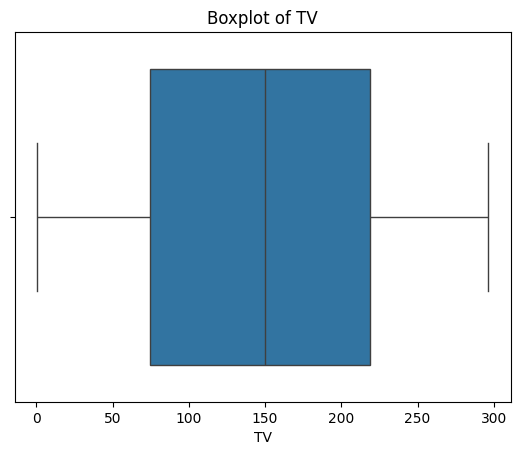

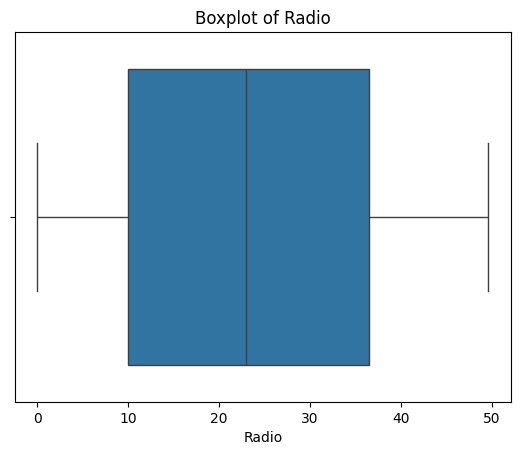

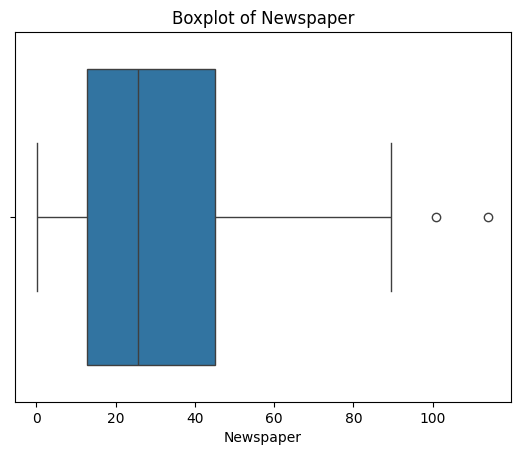

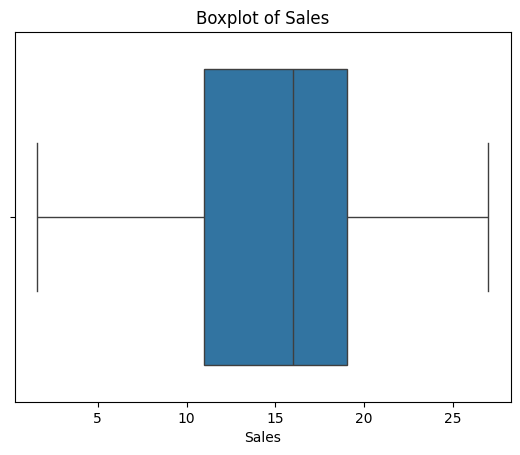

In [ ]:

data = pd.read_csv('Sales.csv')

for column in data.columns:
  if data[column].dtype in ['int64', 'float64']:
    plt.figure()
    sns.boxplot(x=data[column])
    plt.title(f"Boxplot of {column}")
    plt.show()


In [ ]:


for column in data.columns:
  if data[column].dtype in ['int64', 'float64']:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data = data[~(data[column] >= lower_bound) | (data[column] <= upper_bound)]


In [ ]:
data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [ ]:
data.shape

(198, 4)

In [ ]:
data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [ ]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [ ]:
y

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 198, dtype: float64

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data1 = scaler.fit_transform(X)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data1, y, test_size=0.2, random_state=42)

In [ ]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


In [ ]:
def train_and_evaluate_models(X_train, X_test, y_train, y_test):
    models = {
        'Linear Regression': LinearRegression(),
        'Ridge Regression': Ridge(alpha=1.0),
        'Lasso Regression': Lasso(alpha=0.1),
        'ElasticNet Regression': ElasticNet(alpha=0.1, l1_ratio=0.5),
        'Support Vector Regression': SVR(kernel='rbf', C=1.0, epsilon=0.1),
        'Random Forest Regressor': RandomForestRegressor(n_estimators=100, random_state=42),
        'Gradient Boosting Regressor': GradientBoostingRegressor(n_estimators=100, random_state=42)
    }

    results = []

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        results.append((name, model, mse, r2))

    # Find the best model based on R^2 score
    best_model = max(results, key=lambda item: item[3])

    return best_model, results


In [ ]:
  best_model, results = train_and_evaluate_models(X_train, X_test, y_train, y_test)


In [ ]:
 prediction = best_model[1].predict(data1)

In [ ]:
print(prediction)

[21.98  10.459 10.696 16.771 17.585  6.709 11.104 12.969  5.078 16.751
 11.457 17.758  9.119 12.988 18.854 22.981 22.826 11.208 13.389 18.579
 17.536  5.876 20.35  10.03  17.533 14.853 20.605 19.253 10.731 20.876
 12.368 12.598 18.262 12.453 17.786 25.521 14.434  9.99  21.572 17.398
 16.976 20.262 17.748  8.486 16.508 11.462 22.764 19.657 10.244 16.564
 11.321 22.47  21.529 19.959 23.504  5.525 12.915 23.455 18.495  8.53
 25.135 20.295 14.191 15.96  10.989  8.617 12.7   19.234 22.192 18.236
 12.053  8.708 11.678 17.92   9.15   7.136 14.797  4.733 11.409 12.248
 17.339 11.532 13.346 22.093 19.786 12.963 15.798 12.688 16.207 13.429
  7.238 19.242 21.807 12.012 16.945 16.6   19.635 25.524 16.638 16.908
 18.913 19.741 20.25  15.546  7.526 11.953  5.487 19.5   18.197 21.79
 17.189 20.15  14.688 13.779 12.079 11.872 15.726  7.613 14.381  7.924
 16.703 15.28  19.776 11.115  5.722 12.198 23.317  9.778  2.789 17.382
  5.489 19.351 10.512 11.439  9.346 20.324  9.668 21.371 11.221 19.475
 19.146 

In [ ]:
 print(f'The best model is: {best_model[0]} with R^2 Score: {best_model[3]:.4f}')


The best model is: Random Forest Regressor with R^2 Score: 0.9636
